# Unzipping Dataset

In [ ]:
import zipfile
import os

The dataset is large so it was downloded in sub-files of small sizes

In [ ]:
path = '/content/drive/MyDrive/ML_proj/Zip_files'
out = '/content/Dicoms'
for i in os.listdir(path):
  print(i)
  path1 = os.path.join(path, i)
  with zipfile.ZipFile(path1, 'r') as zip_ref:
    zip_ref.extractall(out)
print('completed')

PD_ML.zip
PD_ML1.zip
PD_ML_dataset.zip
PD_ML2.zip
PD_ML3.zip
completed


# Dicom to Nifti Conversion

In [ ]:
!pip install pigz-python
!sudo apt-get install dcm2niix

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libyaml-cpp0.7 pigz
The following NEW packages will be installed:
  dcm2niix libyaml-cpp0.7 pigz
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 417 kB of archives.
After this operation, 1,393 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 pigz amd64 2.6-1 [63.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libyaml-cpp0.7 amd64 0.7.0+dfsg-8build1 [97.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 dcm2niix amd64 1.0.20211006-1build1 [256 kB]
Fetched 417 kB in 0s (1,437 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: falling back to frontend: Readl

In [ ]:
import os

root_dir = os.path.join(out)
output_dir = '/content/drive/MyDrive/ML_proj/Nifti'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for subfolderA in os.listdir(root_dir):
    subfolderA_path = os.path.join(root_dir, subfolderA)
    for subfolder1 in os.listdir(subfolderA_path):
        subfolder1_path = os.path.join(subfolderA_path, subfolder1)
        if os.path.isdir(subfolder1_path):
            print(f'{subfolder1} under process')
            for subfolder2 in os.listdir(subfolder1_path):
                subfolder2_path = os.path.join(subfolder1_path, subfolder2)
                if os.path.isdir(subfolder2_path):
                    for subfolder3 in os.listdir(subfolder2_path):
                        subfolder3_path = os.path.join(subfolder2_path, subfolder3)
                        dti_files = []
                        out_path = os.path.join(output_dir, f'{subfolder1}.nii.gz')
                        if os.path.isdir(subfolder3_path):
                            for subfolder4 in os.listdir(subfolder3_path):
                              if os.path.exists(os.path.join(output_dir, f'{subfolder1}_{subfolder4}.nii.gz')):
                                print(f'{subfolder1}_{subfolder4}.nii.gz already exist, skipping')
                                continue
                              subfolder4_path = os.path.join(subfolder3_path, subfolder4)
                              if os.path.isdir(subfolder4_path):
                                print(f'{subfolder1}_{subfolder4} under process')
                              out_p = os.path.join(output_dir, f"{subfolder1}_{subfolder4}.nii.gz")
                              !dcm2niix -o {output_dir} -z y -i y -f {subfolder1+'_'+subfolder4} -b y {subfolder4_path}


# Registration

Now Register nifti images created in above step to MNU-PD25 atlas before going to next step as registeration is necessary for feature extraction
and comparison.

# Features Etraction

In [ ]:
!pip install pyradiomics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 30.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 17.9 MB/s eta 0:00:

In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import os
from natsort import natsorted

In [ ]:
path = '/content/drive/MyDrive/ML_proj/Registered/Healthy'
out = '/content/drive/MyDrive/ML_proj/Features2/Healthy'
if not os.path.exists(out):
      os.makedirs(out)
Mask = '/content/drive/MyDrive/ML_proj/MNUPD25/PD25-subcortical-1mm_bmask.nii.gz'

In [ ]:
count = 0
for i in natsorted(os.listdir(path)):
  if count<510:
    print(i)
    if i.endswith('.nii.gz'):
      file_name = i.split('.nii.gz')[0]
      if os.path.exists(os.path.join(out, file_name+'.csv')):
            print(f'{file_name}.csv already exists, skipping')
            count += 1
            continue
      img_path = os.path.join(path, i)
      #image_path = eval(img_path)
      # print(i.split('.nii.gz')[0])
      #print(h)

      out_file = os.path.join(out, file_name+'.csv') # , i.split('.nii.gz')[i]
      #image = sitk.ReadImage(img_path)
      !pyradiomics {img_path} {Mask} -o {out_file} -f csv
      count+=1
  else:
    break
print(f"Features extracted for {count} subjects")

In [ ]:
masked = nib.load(Mask)
masked.shape

(193, 229, 193)

In [ ]:
mask = masked.get_fdata()

In [ ]:
!pip install -U nilearn
from nilearn import plotting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 29.8 MB/s eta 0:00:00


In [ ]:
binary_mask_data = np.where(mask > 0, 1, 0)
binary_mask = nib.Nifti1Image(binary_mask_data, masked.affine, masked.header)



/usr/local/lib/python3.10/dist-packages/nilearn/plotting/img_plotting.py:407: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  anat_img = new_img_like(anat_img, data, affine=anat_img.affine)


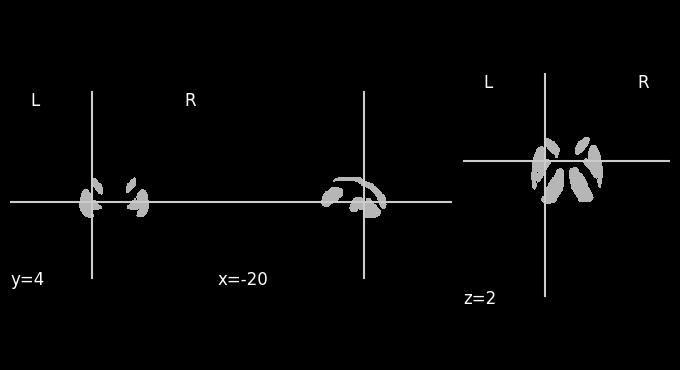

In [ ]:
plotting.plot_anat(binary_mask, cut_coords=(-20, 4, 2))

In [ ]:
binary_mask.to_filename('/content/drive/MyDrive/ML_proj/MNUPD25/PD25-subcortical-1mm_bmask.nii.gz')

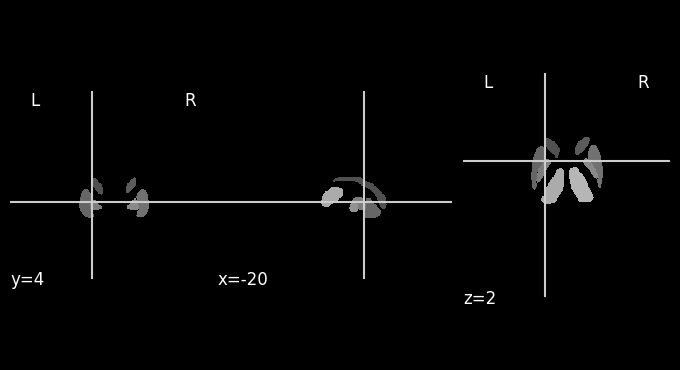

In [ ]:
plotting.plot_anat(masked, cut_coords=(-20, 4, 2))

# Combining CSVs

In [ ]:
import os
import pandas as pd
import numpy as np
from natsort import natsorted


In [ ]:
path = '/content/drive/MyDrive/ML_proj/Features2'
dfs = []
count = 0
# Iterate through subdirectories in the main path
for i in natsorted(os.listdir(path)):
    sub_path = os.path.join(path, i)

    # Iterate through files in the subdirectory
    for file_name in natsorted(os.listdir(sub_path)):
      if file_name.endswith('.csv'):
        print(file_name)
        file_path = os.path.join(sub_path, file_name)

        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)

        # Add a 'class' column to the DataFrame and set its value to the current subdirectory name (i)
        df['class'] = i

        # Append the DataFrame to the list
        dfs.append(df)
        count += 1
    print(count)


# Now, dfs is a list of DataFrames, each with an added 'class' column
combined_df = pd.concat(dfs, ignore_index=True)



# Data Exploration

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from scipy.stats import zscore
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier


Remove First 24 Columns as they are not related to our project

In [ ]:
combined_df = combined_df.iloc[:, 24:]
combined_df

original_shape_Elongation  original_shape_Flatness  \
0                     0.779779                 0.421568   
1                     0.779779                 0.421568   
2                     0.779779                 0.421568   
3                     0.779779                 0.421568   
4                     0.779779                 0.421568   
..                         ...                      ...   
979                   0.779779                 0.421568   
980                   0.779779                 0.421568   
981                   0.779779                 0.421568   
982                   0.779779                 0.421568   
983                   0.779779                 0.421568   

     original_shape_LeastAxisLength  original_shape_MajorAxisLength  \
0                          32.01031                       75.931633   
1                          32.01031                       75.931633   
2                          32.01031                       75.931633   
3                          32.01031                       75.931633   
4                          32.01031                       75.931633   
..                              ...                             ...   
979                        32.01031                       75.931633   
980                        32.01031                       75.931633   
981                        32.01031                       75.931633   
982                        32.01031                       75.931633   
983                        32.01031                       75.931633   

     original_shape_Maximum2DDiameterColumn  \
0                                 67.601775   
1                                 67.601775   
2                                 67.601775   
3                                 67.601775   
4                                 67.601775   
..                                      ...   
979                               67.601775   
980                               67.601775   
981                               67.601775   
982                               67.601775   
983                               67.601775   

     original_shape_Maximum2DDiameterRow  \
0                              61.814238   
1                              61.814238   
2                              61.814238   
3                              61.814238   
4                              61.814238   
..                                   ...   
979                            61.814238   
980                            61.814238   
981                            61.814238   
982                            61.814238   
983                            61.814238   

     original_shape_Maximum2DDiameterSlice  original_shape_Maximum3DDiameter  \
0                                74.060786                         74.229374   
1                                74.060786                         74.229374   
2                                74.060786                         74.229374   
3                                74.060786                         74.229374   
4                                74.060786                         74.229374   
..                                     ...                               ...   
979                              74.060786                         74.229374   
980                              74.060786                         74.229374   
981                              74.060786                         74.229374   
982                              74.060786                         74.229374   
983                              74.060786                         74.229374   

     original_shape_MeshVolume  original_shape_MinorAxisLength  ...  \
0                 43740.666667                       59.209918  ...   
1                 43740.666667                       59.209918  ...   
2                 43740.666667                       59.209918  ...   
3                 43740.666667                       59.209918  ...   
4                 43740.666667   

In [ ]:
# Check if values are the same in each column
columns_to_drop = [col for col in combined_df.columns if combined_df[col].nunique() == 1]

# Drop columns with the same values
combined_df = combined_df.drop(columns=columns_to_drop)

In [ ]:
combined_df

original_firstorder_10Percentile  original_firstorder_90Percentile  \
0                          376.887061                        452.657440   
1                         1339.955005                       1698.769214   
2                         1253.228711                       1580.040015   
3                         1486.487622                       1798.005322   
4                         1385.145386                       1721.686230   
..                                ...                               ...   
979                        215.987637                        298.094232   
980                        204.399155                        289.623108   
981                        216.536041                        304.772791   
982                        205.928458                        284.663666   
983                        205.094751                        299.798993   

     original_firstorder_Energy  original_firstorder_Entropy  \
0                  7.499335e+09                     2.443337   
1                  1.018852e+11                     4.673930   
2                  8.812310e+10                     4.474478   
3                  1.186344e+11                     4.464402   
4                  1.060276e+11                     4.561917   
..                          ...                          ...   
979                2.916217e+09                     2.570572   
980                2.699150e+09                     2.620092   
981                2.988618e+09                     2.633910   
982                2.641044e+09                     2.451400   
983                2.855780e+09                     2.709097   

     original_firstorder_InterquartileRange  original_firstorder_Kurtosis  \
0                                 41.880981                      8.155804   
1                                179.628418                      8.274374   
2                                146.946594                      7.385406   
3                                159.791077                      7.437434   
4                                177.360474                      6.714416   
..                                      ...                           ...   
979                               43.237473                      6.836284   
980                               44.391235                      6.705623   
981                               48.510704                      6.511942   
982                               44.625366                      3.849628   
983                               45.819916                      6.368829   

     original_firstorder_Maximum  original_firstorder_MeanAbsoluteDeviation  \
0                     526.283569                                  26.093703   
1                    1947.021729                                 128.708883   
2                    1926.095703                                 108.017265   
3                    2087.609131                                 107.400024   
4                    2055.322998                                 115.274058   
..                           ...                                        ...   
979                   358.943420                                  28.393895   
980                   360.825623                                  29.365939   
981                   362.526886                                  29.991923   
982                   358.422272                                  26.145309   
983                   368.244263                                  31.436680   

     original_firstorder_Mean  original_firstorder_Median  ...  \
0                  411.481429                  412.686615  ...   
1                 1510.702707                 1535.422241  ...   
2                 1406.950834                 1415.240479  ...   
3                 1635.806742                 1649.023315  ...   
4                 1544.794837                 1555.364014  ...   
..                        ...                         ...  ...   

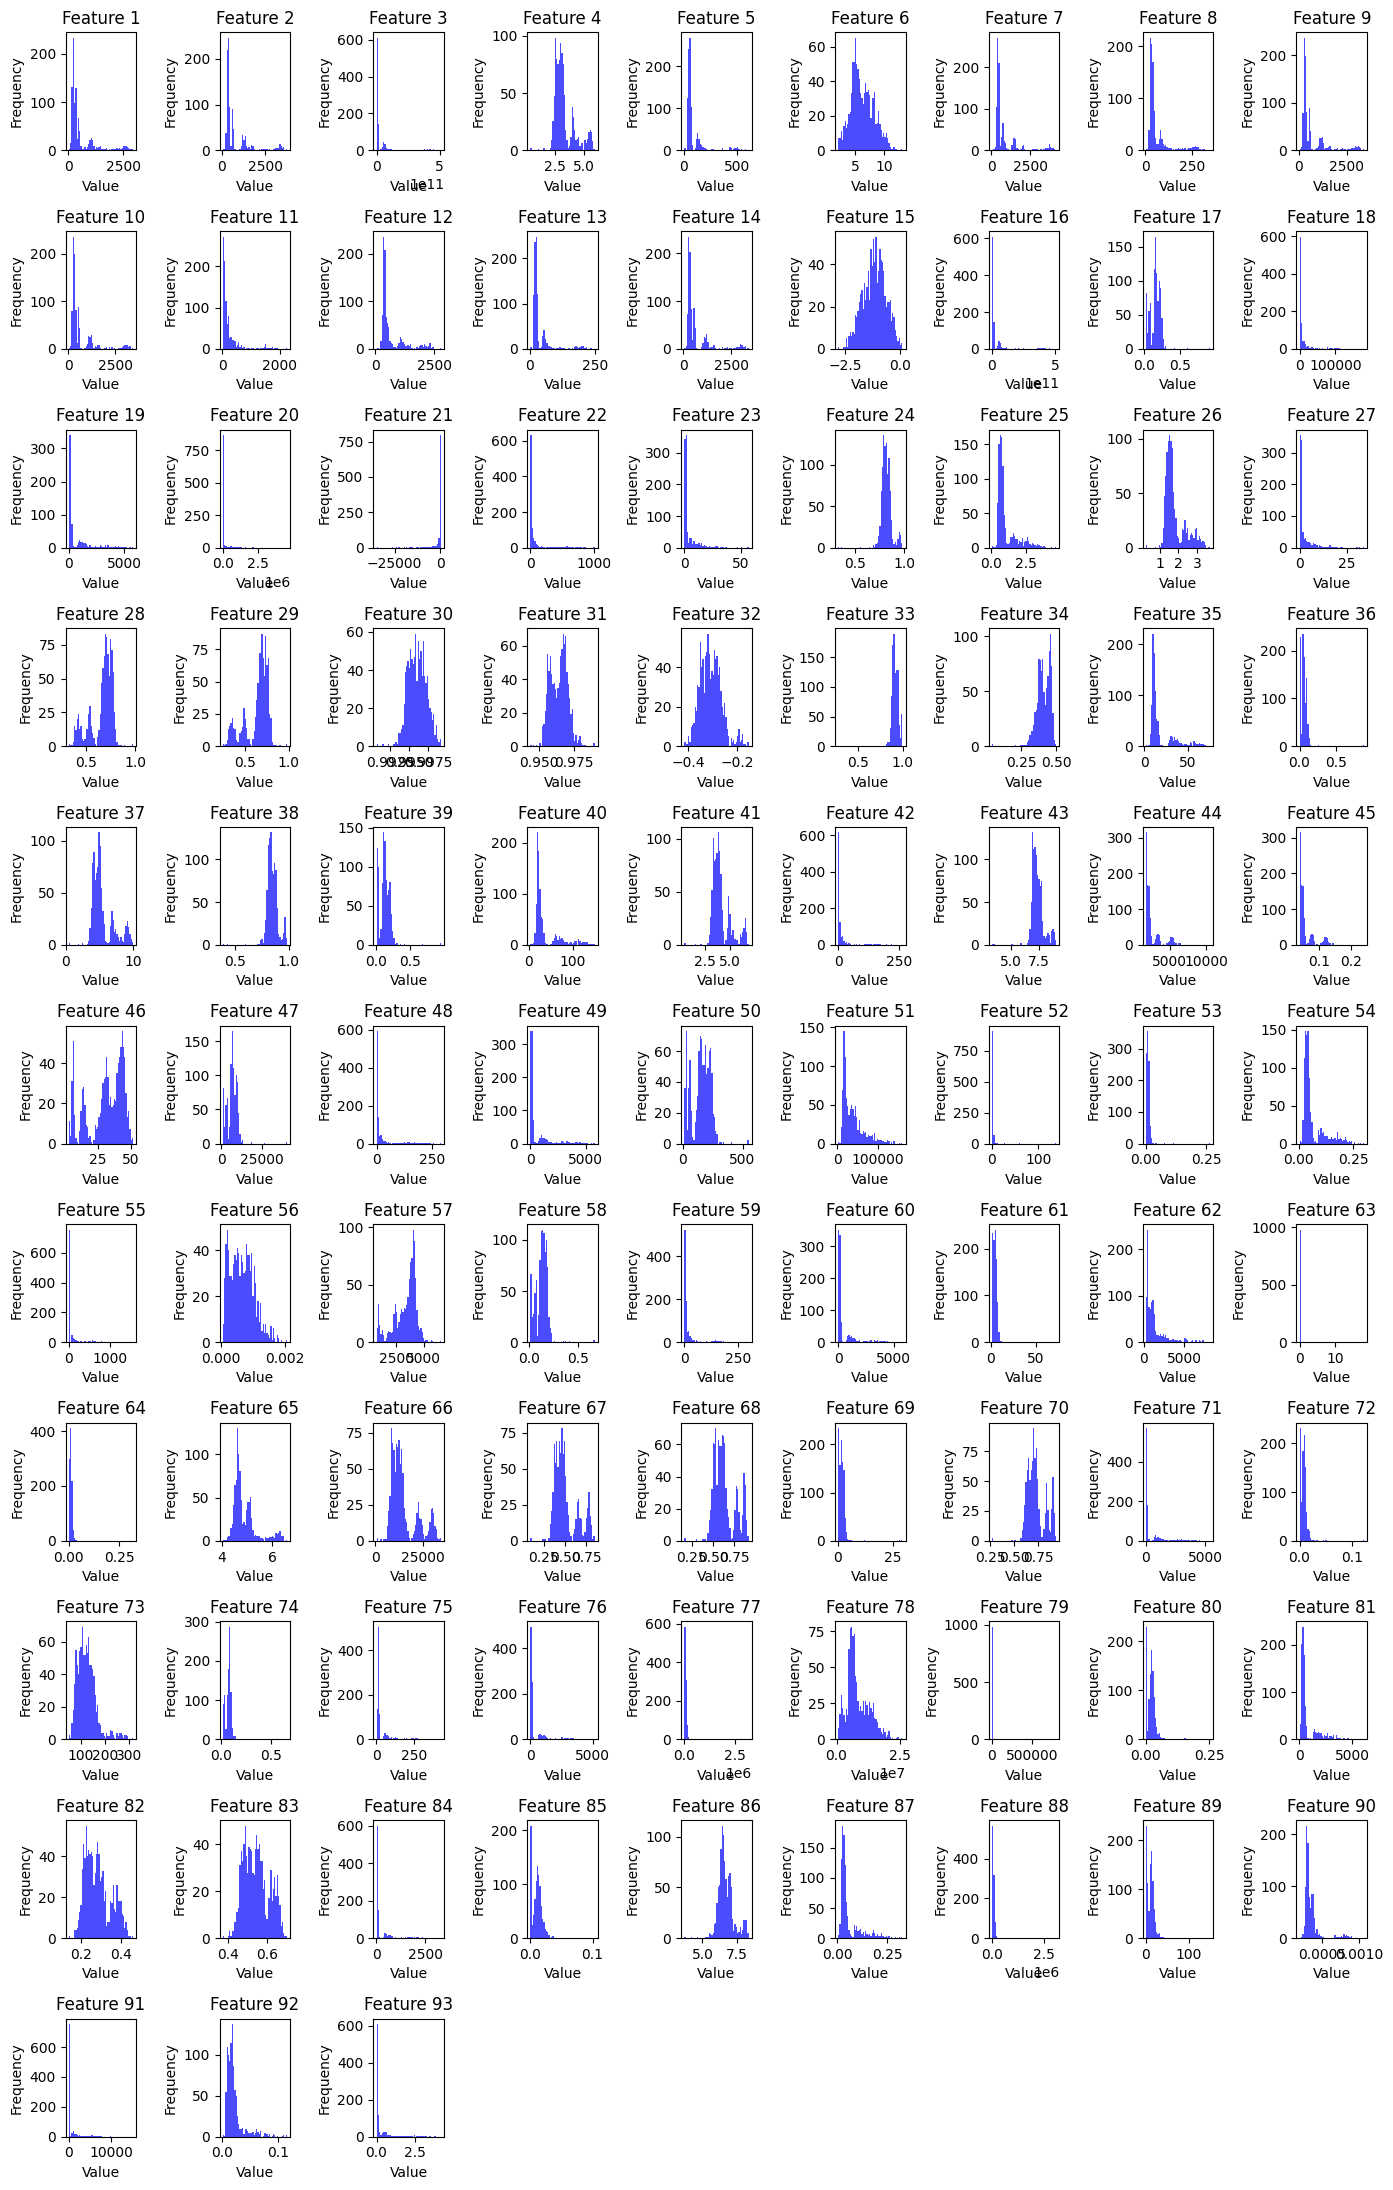

In [ ]:

X_train_transformed_df = combined_df.drop(['class'], axis='columns')
n_rows = int(np.ceil(X_train_transformed_df.shape[1] / 9))
n_cols = 9

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 2*n_rows))
axes = axes.flatten()
for i in range(X_train_transformed_df.shape[1], n_rows*n_cols):
    fig.delaxes(axes[i])
for i in range(X_train_transformed_df.shape[1]):
    axes[i].hist(X_train_transformed_df.iloc[:, i], bins=50, color='blue', alpha=0.7)
    axes[i].set_title(f'Feature {i+1}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### PCA plot Befor Feature Selection

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


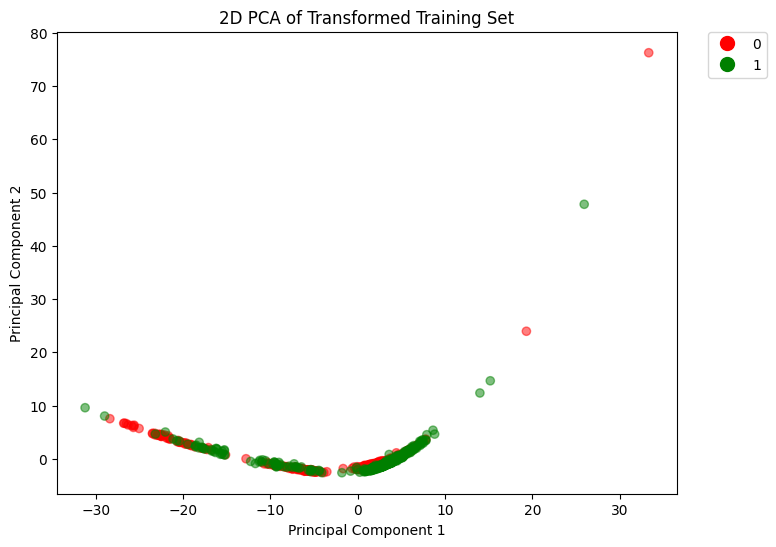

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
data_scaled = scaler.fit_transform(combined_df.drop(['class'], axis='columns'))
lm = LabelEncoder()
y_un = lm.fit_transform(combined_df[['class']])
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
X_train_transformed_pca_df = pd.DataFrame(data = data_pca, columns = ['Principal Component 1', 'Principal Component 2'])

colors = ['red', 'green']
unique_labels = np.unique(y_un)
label_colors = {label: colors[i] for i, label in enumerate(unique_labels)}
label_colors_array = [label_colors[label] for label in y_un]
plt.figure(figsize=(8,6))
plt.scatter(X_train_transformed_pca_df['Principal Component 1'], X_train_transformed_pca_df['Principal Component 2'], c=label_colors_array, alpha=0.5)
plt.title('2D PCA of Transformed Training Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

patches = [plt.plot([],[], marker="o", ms=10, ls="", color=colors[i],
            label="{:d}".format(unique_labels[i]) )[0]  for i in range(len(unique_labels))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.show()

<Axes: xlabel='original_firstorder_10Percentile', ylabel='original_firstorder_10Percentile'>

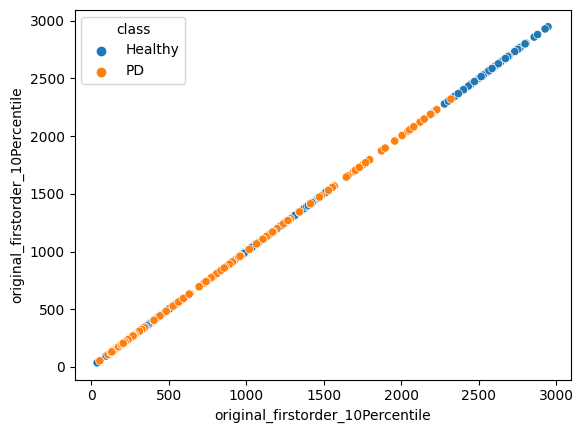

In [ ]:
sns.scatterplot(x='original_firstorder_10Percentile', y= "original_firstorder_10Percentile",hue='class', data=combined_df)

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 94 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   original_firstorder_10Percentile                    984 non-null    float64
 1   original_firstorder_90Percentile                    984 non-null    float64
 2   original_firstorder_Energy                          984 non-null    float64
 3   original_firstorder_Entropy                         984 non-null    float64
 4   original_firstorder_InterquartileRange              984 non-null    float64
 5   original_firstorder_Kurtosis                        984 non-null    float64
 6   original_firstorder_Maximum                         984 non-null    float64
 7   original_firstorder_MeanAbsoluteDeviation           984 non-null    float64
 8   original_firstorder_Mean                            984 non-null    float64
 9  

In [ ]:
# dataset dimensions
print(combined_df.shape, '\n')
combined_df.describe()

(984, 94) 



original_firstorder_10Percentile  original_firstorder_90Percentile  \
count                        984.000000                        984.000000   
mean                         595.225039                        782.092859   
std                          631.323978                        808.254649   
min                           36.273463                         46.924928   
25%                          229.459354                        339.816640   
50%                          330.146082                        415.644064   
75%                          545.676834                        674.892178   
max                         2947.854688                       3775.926367   

       original_firstorder_Energy  original_firstorder_Entropy  \
count                9.840000e+02                   984.000000   
mean                 4.427731e+10                     3.265561   
std                  9.855836e+10                     0.906756   
min                  7.681624e+07                     0.299290   
25%                  3.648335e+09                     2.651437   
50%                  6.038820e+09                     2.994435   
75%                  1.623509e+10                     3.444630   
max                  5.106270e+11                     5.976730   

       original_firstorder_InterquartileRange  original_firstorder_Kurtosis  \
count                              984.000000                    984.000000   
mean                                98.304546                      6.221642   
std                                109.732986                      1.988914   
min                                  5.041021                      1.981784   
25%                                 45.586525                      4.793973   
50%                                 58.534180                      5.943987   
75%                                 75.602448                      7.598941   
max                                604.553833                     13.170434   

       original_firstorder_Maximum  original_firstorder_MeanAbsoluteDeviation  \
count                   984.000000                                 984.000000   
mean                    926.907513                                  62.409041   
std                     898.701626                                  61.384177   
min                      57.423954                                   3.718441   
25%                     432.410118                                  30.664458   
50%                     493.512741                                  38.731536   
75%                     931.701904                                  59.715655   
max                    4156.120117                                 345.693134   

       original_firstorder_Mean  original_firstorder_Median  ...  \
count                984.000000                  984.000000  ...   
mean                 688.209101                  695.986141  ...   
std                  722.007417                  730.226808  ...   
min                   41.438202                   42.111298  ...   
25%                  283.159614                  287.493401  ...   
50%                  368.350745                  372.467041  ...   
75%                  604.840018                  613.177383  ...   
max                 3393.941941                 3435.276611  ...   

       original_glszm_SmallAreaHighGrayLevelEmphasis  \
count                                     984.000000   
mean                                      292.273258   
std                                       535.777199   
min                                         3.745775   
25%                                        46.060012   
50%                                        60.005140   
75%                                       100.402183   
max                                      3297.265480   

       original_glszm_SmallAreaLowGrayLevelEmphasis  \
count                                    984.000000   
mean                                       0.011

In [ ]:
combined_df.isnull().sum()

original_firstorder_10Percentile          0
original_firstorder_90Percentile          0
original_firstorder_Energy                0
original_firstorder_Entropy               0
original_firstorder_InterquartileRange    0
                                         ..
original_ngtdm_Coarseness                 0
original_ngtdm_Complexity                 0
original_ngtdm_Contrast                   0
original_ngtdm_Strength                   0
class                                     0
Length: 94, dtype: int64

In [ ]:
# One-hot encode the target class
encoded_df = pd.get_dummies(combined_df, columns = ['class'])

In [ ]:
encoded_df

original_firstorder_10Percentile  original_firstorder_90Percentile  \
0                          376.887061                        452.657440   
1                         1339.955005                       1698.769214   
2                         1253.228711                       1580.040015   
3                         1486.487622                       1798.005322   
4                         1385.145386                       1721.686230   
..                                ...                               ...   
979                        215.987637                        298.094232   
980                        204.399155                        289.623108   
981                        216.536041                        304.772791   
982                        205.928458                        284.663666   
983                        205.094751                        299.798993   

     original_firstorder_Energy  original_firstorder_Entropy  \
0                  7.499335e+09                     2.443337   
1                  1.018852e+11                     4.673930   
2                  8.812310e+10                     4.474478   
3                  1.186344e+11                     4.464402   
4                  1.060276e+11                     4.561917   
..                          ...                          ...   
979                2.916217e+09                     2.570572   
980                2.699150e+09                     2.620092   
981                2.988618e+09                     2.633910   
982                2.641044e+09                     2.451400   
983                2.855780e+09                     2.709097   

     original_firstorder_InterquartileRange  original_firstorder_Kurtosis  \
0                                 41.880981                      8.155804   
1                                179.628418                      8.274374   
2                                146.946594                      7.385406   
3                                159.791077                      7.437434   
4                                177.360474                      6.714416   
..                                      ...                           ...   
979                               43.237473                      6.836284   
980                               44.391235                      6.705623   
981                               48.510704                      6.511942   
982                               44.625366                      3.849628   
983                               45.819916                      6.368829   

     original_firstorder_Maximum  original_firstorder_MeanAbsoluteDeviation  \
0                     526.283569                                  26.093703   
1                    1947.021729                                 128.708883   
2                    1926.095703                                 108.017265   
3                    2087.609131                                 107.400024   
4                    2055.322998                                 115.274058   
..                           ...                                        ...   
979                   358.943420                                  28.393895   
980                   360.825623                                  29.365939   
981                   362.526886                                  29.991923   
982                   358.422272                                  26.145309   
983                   368.244263                                  31.436680   

     original_firstorder_Mean  original_firstorder_Median  ...  \
0                  411.481429                  412.686615  ...   
1                 1510.702707                 1535.422241  ...   
2                 1406.950834                 1415.240479  ...   
3                 1635.806742                 1649.023315  ...   
4                 1544.794837                 1555.364014  ...   
..                        ...                         ...  ...   

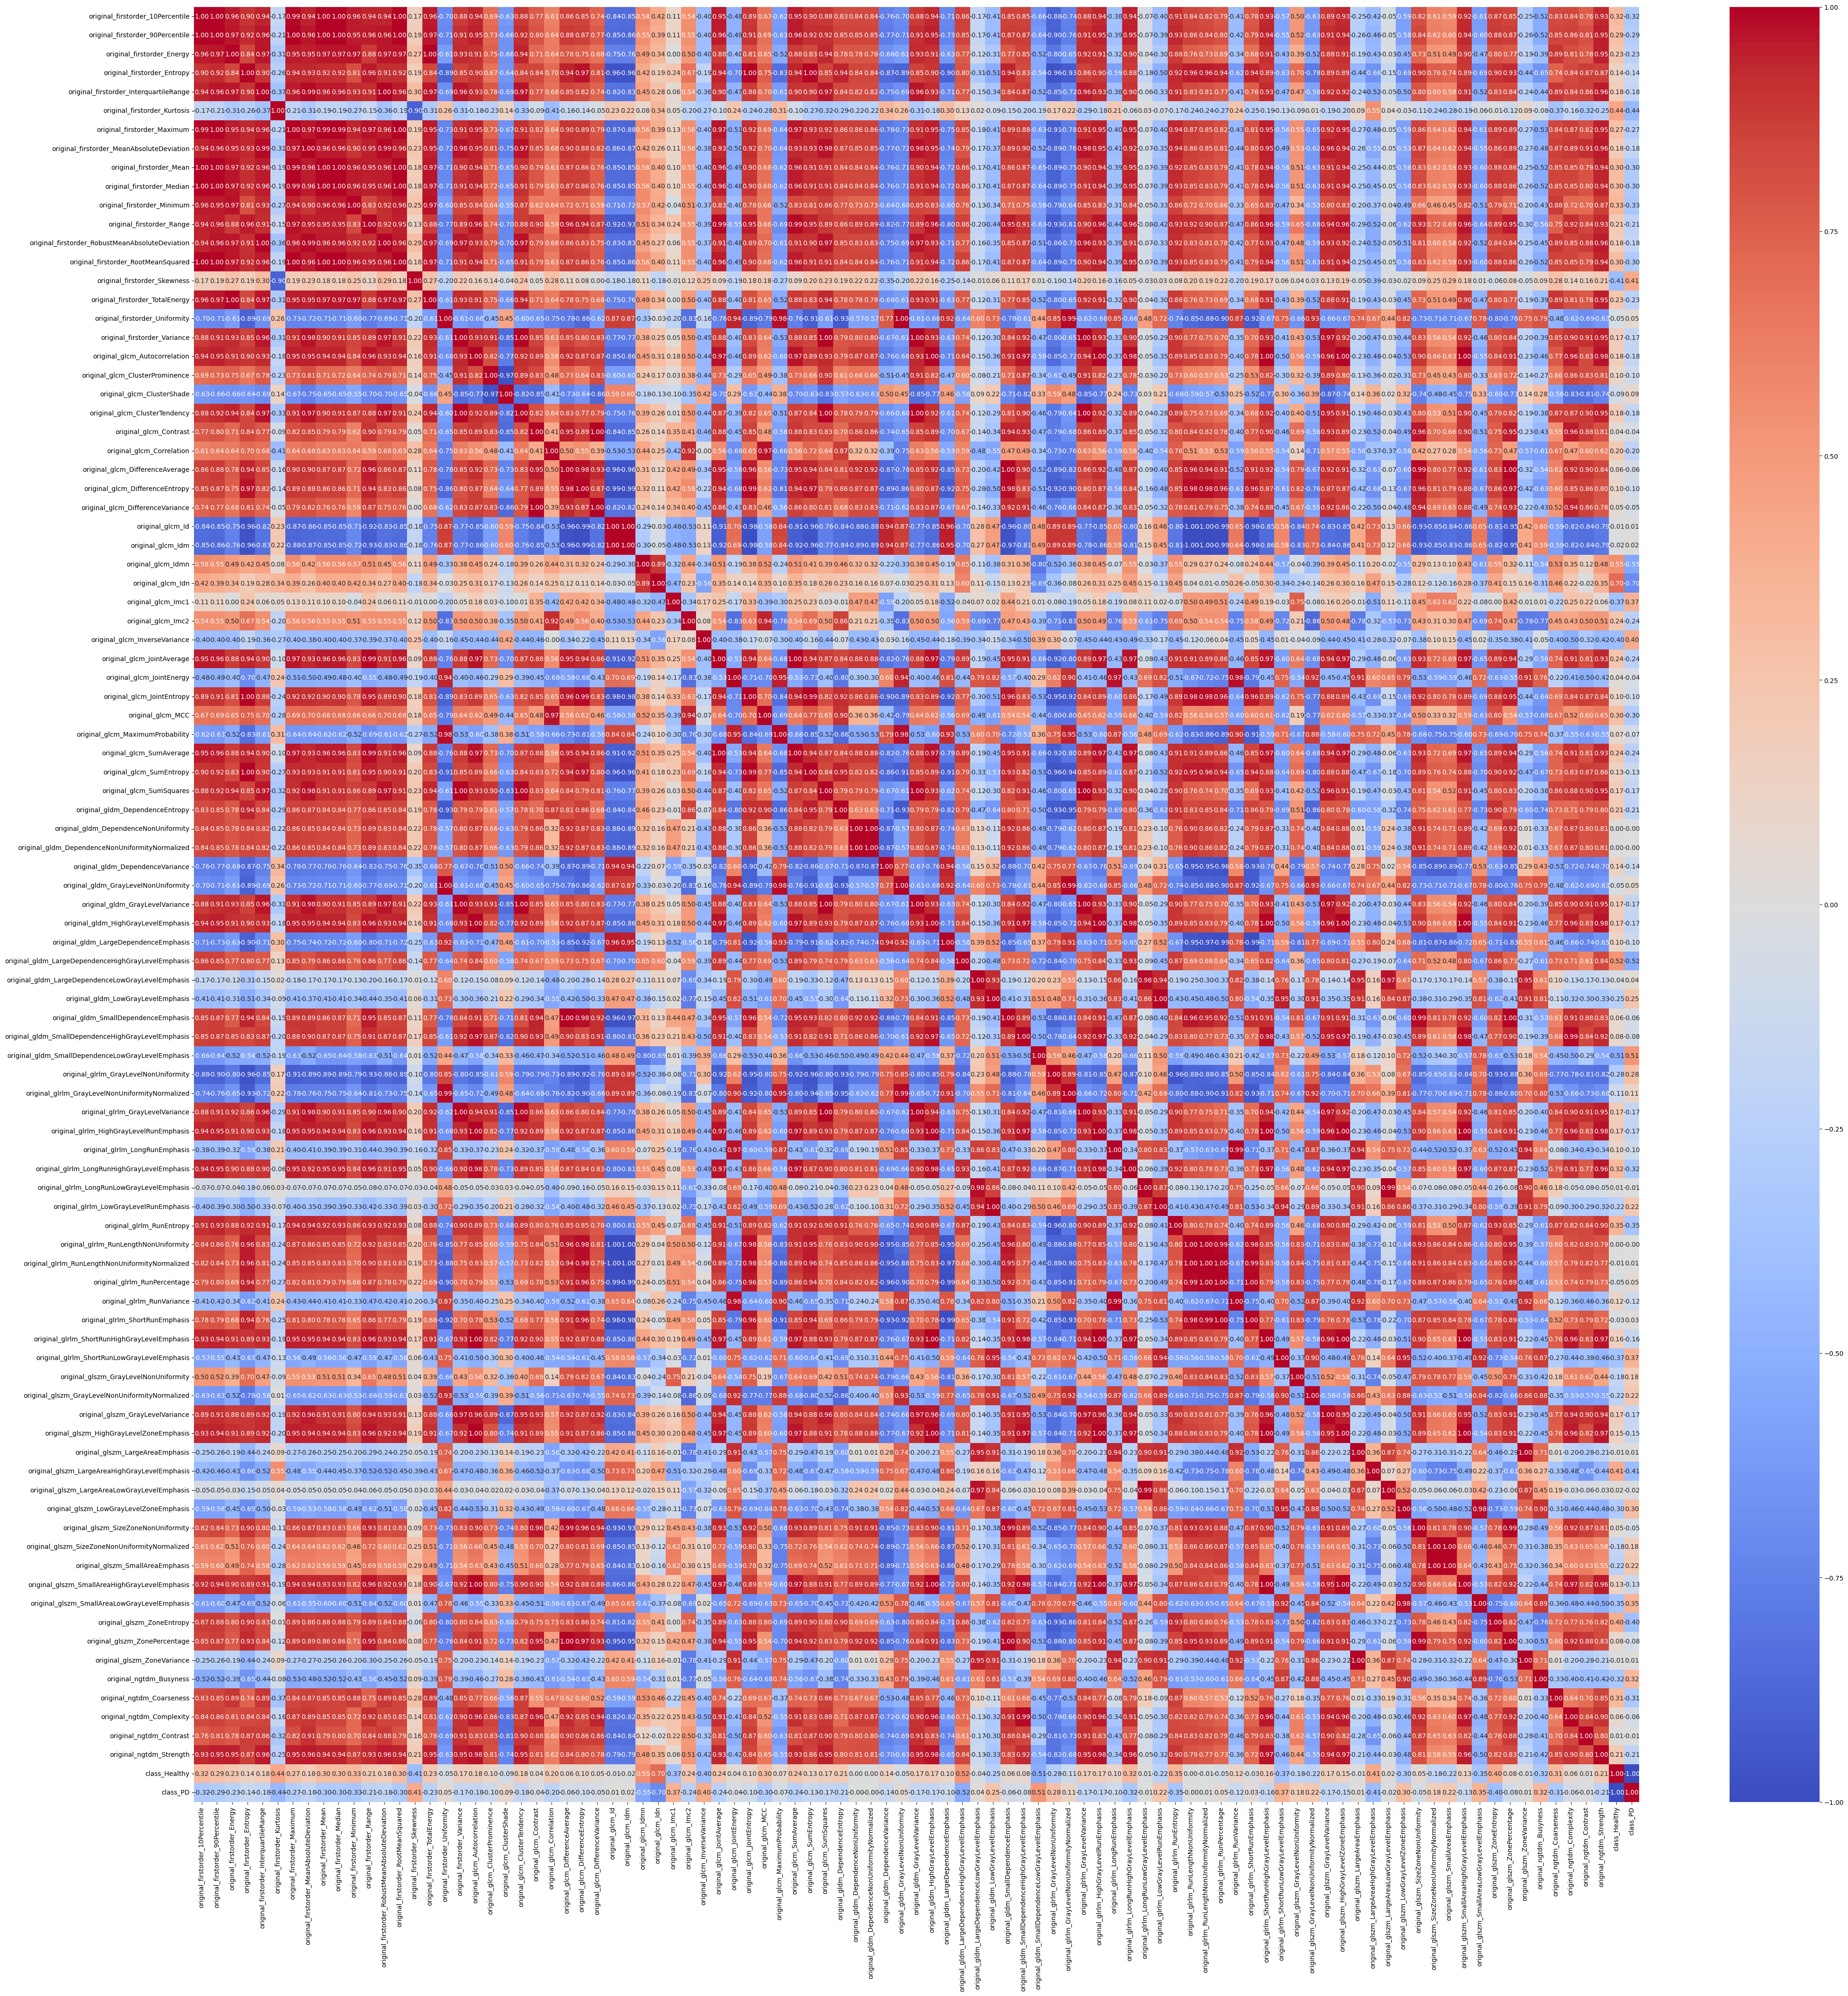

In [ ]:
plt.figure(figsize=(50, 50))
dataplot = sns.heatmap(encoded_df.corr(), annot=True, fmt='.2f', cmap="coolwarm")
#plt.savefig('/content/drive/MyDrive/ML_proj/co_relation_matrix.png', dpi=90)
plt.show()

<ipython-input-36-af51f5c4996a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pp = sns.clustermap(combined_df.corr(), cmap="mako", linewidths=.5, figsize=(13,13))


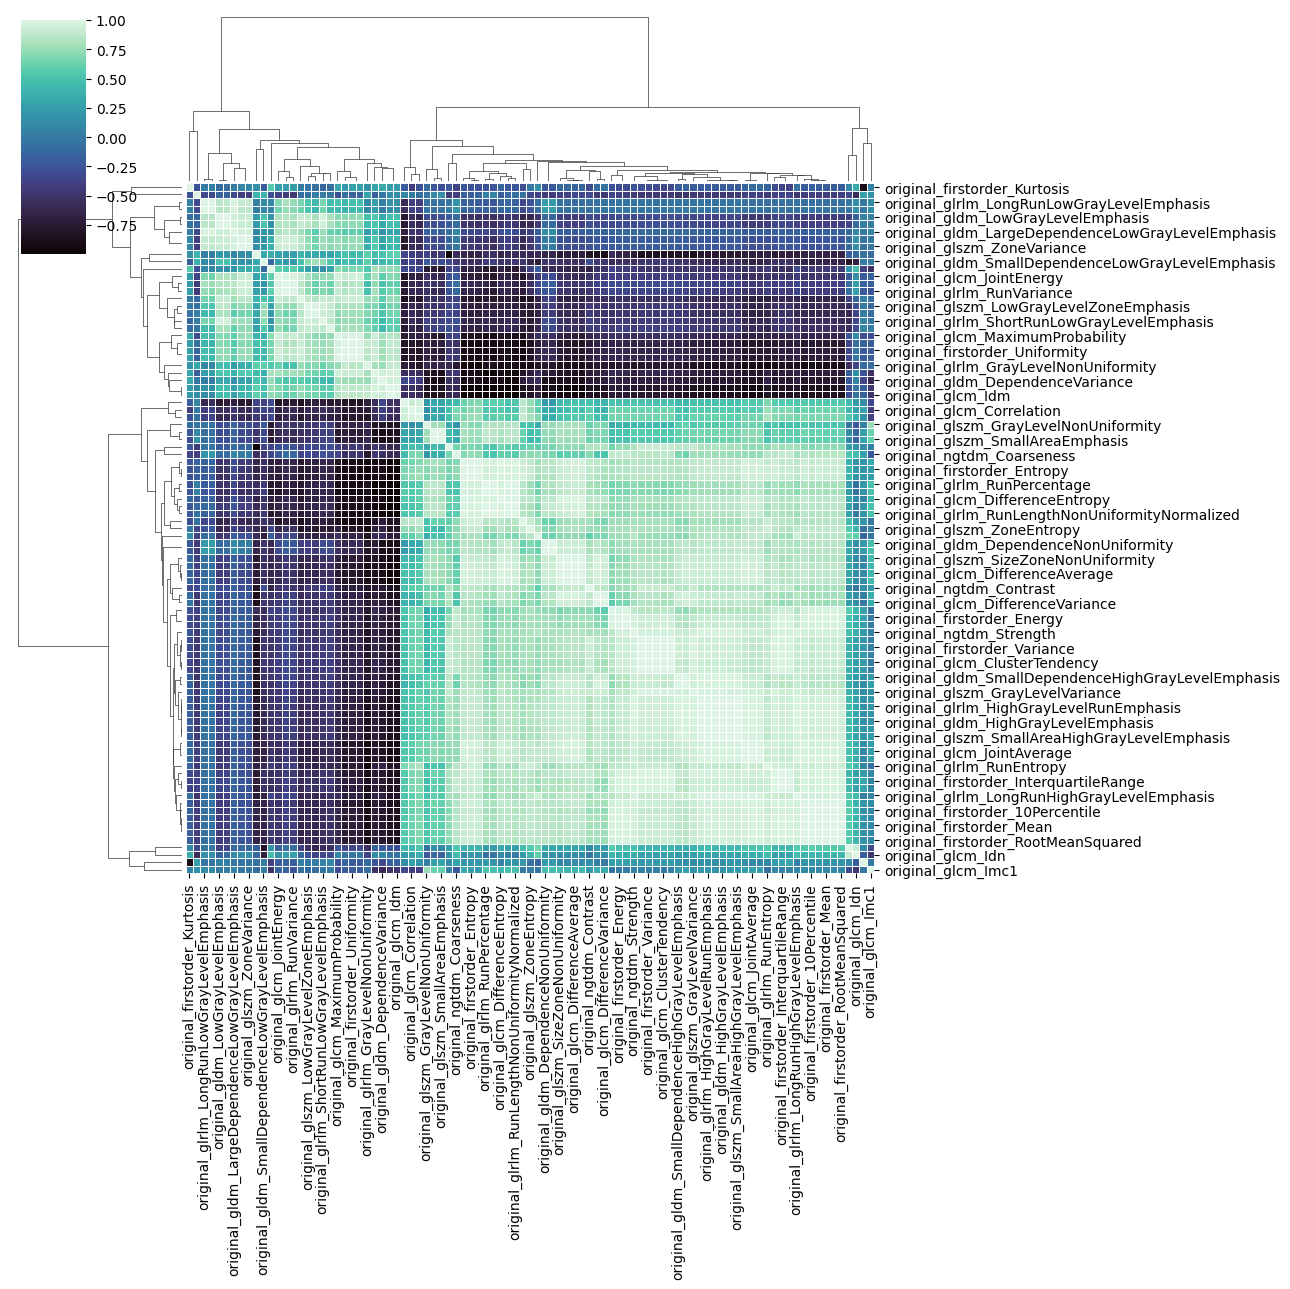

In [ ]:
pp = sns.clustermap(combined_df.corr(), cmap="mako", linewidths=.5, figsize=(13,13))
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)

plt.show()

In [ ]:
shuffled_encoded_df = combined_df.sample(frac=1, random_state=0).reset_index(drop=True)

In [ ]:
minmax = MinMaxScaler()
X = shuffled_encoded_df.drop(['class_Healthy', 'class_PD'] ,axis='columns')
y = shuffled_encoded_df[['class_Healthy', 'class_PD']]

In [ ]:
X

original_firstorder_10Percentile  original_firstorder_90Percentile  \
0                          222.018207                        358.756268   
1                          183.326584                        541.966650   
2                          229.484030                        328.128528   
3                           98.671576                        418.448175   
4                          287.339301                        599.196777   
..                                ...                               ...   
980                        194.182404                        535.104956   
981                        102.821172                        424.910596   
982                       1268.490527                       1527.158105   
983                         94.838785                        404.689496   
984                        703.414014                       1242.329126   

     original_firstorder_Energy  original_firstorder_Entropy  \
0                  3.996298e+09                     3.109839   
1                  6.570966e+09                     3.494449   
2                  3.451068e+09                     2.818535   
3                  3.839029e+09                     3.251484   
4                  1.210109e+10                     3.362745   
..                          ...                          ...   
980                8.219329e+09                     3.341401   
981                4.566090e+09                     3.361446   
982                8.583099e+10                     4.216443   
983                2.922320e+09                     2.866617   
984                5.464715e+10                     4.020178   

     original_firstorder_InterquartileRange  original_firstorder_Kurtosis  \
0                                 53.544113                      5.396483   
1                                322.049187                      1.207498   
2                                 53.636032                      5.272364   
3                                292.468540                      1.196272   
4                                 76.114029                      4.384755   
..                                      ...                           ...   
980                              289.787468                      1.695447   
981                              285.175491                      1.502591   
982                              127.689026                     10.874973   
983                              273.182365                      1.275498   
984                              138.796204                      6.655383   

     original_firstorder_Maximum  original_firstorder_MeanAbsoluteDeviation  \
0                     478.476044                                  42.650677   
1                     669.450195                                 149.063340   
2                     411.543640                                  34.029956   
3                     471.375214                                 132.174360   
4                     684.618164                                  85.512021   
..                           ...                                        ...   
980                   614.786560                                 126.260365   
981                   470.190491                                 121.743719   
982                  1746.059448                                  94.792635   
983                   442.727692                                 130.166912   
984                  1357.702515                                 172.639040   

     original_firstorder_Mean  original_firstorder_Median  ...  \
0                  295.217232                  303.115967  ...   
1                  353.888301                  321.419128  ...   
2                  276.457266                  279.420319  ...   
3                  261.326921                  307.421906  ...   
4                  512.030096                  557.199585  ...   
..                        ...                         ...  ...   

In [ ]:
y

class_Healthy  class_PD
0                0         1
1                1         0
2                0         1
3                1         0
4                1         0
..             ...       ...
980              1         0
981              1         0
982              0         1
983              1         0
984              1         0

[985 rows x 2 columns]

# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=42)
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)
print(len(X_train))
print(len(X_test))

886
99


In [ ]:
y_train

class_Healthy  class_PD
615              1         0
887              1         0
792              1         0
254              0         1
909              1         0
..             ...       ...
106              1         0
270              1         0
860              0         1
435              1         0
102              1         0

[886 rows x 2 columns]

In [ ]:
y_test

class_Healthy  class_PD
613              1         0
451              1         0
731              0         1
436              1         0
275              1         0
..             ...       ...
878              1         0
558              1         0
533              1         0
668              1         0
689              1         0

[99 rows x 2 columns]

# Model Training And Evaluation

In [ ]:
yte_arr = y_test.values
ytr_arr = y_train.values

In [ ]:
# Random Forest
model = RandomForestClassifier()
model.fit(X_train, ytr_arr)
pred = model.predict(X_test)
mse = mean_squared_error(yte_arr, pred)
r2 = r2_score(yte_arr, pred)
print("Random Forest:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}\n")

Random Forest:
Mean Squared Error: 0.0101
R-squared: 0.9577



In [ ]:
y_test.value_counts()

class_Healthy  class_PD
1              0           60
0              1           39
dtype: int64

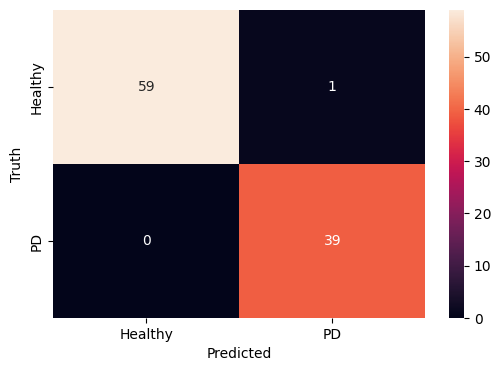

In [ ]:
# Confusion Matrix
class_names = ('Healthy', 'PD')
y_te = yte_arr.argmax(axis=1)
rf_pr = pred.argmax(axis=1)
cnf_matrix = metrics.confusion_matrix(y_te, rf_pr)

plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix, annot=True, xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

In [ ]:
# Classification Report

print(metrics.classification_report(y_te, rf_pr, target_names=class_names))

              precision    recall  f1-score   support

     Healthy       1.00      0.98      0.99        60
          PD       0.97      1.00      0.99        39

    accuracy                           0.99        99
   macro avg       0.99      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99



# ***PROGRESS***


> Train, Validation and Test Split of the data

> Previous Model tunning using validation data

1.   Training And Validating the model
2.   Plotting Training Curves
3.   Testing on test data
4.   Confusion Matrix and report



> Updated Model with reduced features

1.   Training And Validating the model
2.   Plotting Training Curves
3.   Testing on test data
4.   Confusion Matrix and report







In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
shuffled_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
train_data, val_data, test_data = np.split(shuffled_df, [int(.7*len(shuffled_df)), int(.85*len(shuffled_df))])
print(f"Size of Train set: {len(train_data)} \nSize of Valid set: {len(val_data)} \nSize of Test set: {len(test_data)}")

Size of Train set: 688 
Size of Valid set: 148 
Size of Test set: 148


In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder
scalar = StandardScaler()
X_train = train_data.drop(['class'], axis='columns')
y_train = train_data[['class']]

X_val = val_data.drop(['class'], axis='columns')
y_val = val_data[['class']]

X_test= test_data.drop(['class'], axis='columns')
y_test = test_data[['class']]

X_train = scalar.fit_transform(X_train)
X_val = scalar.transform(X_val)
X_test = scalar.transform(X_test)

In [ ]:
y_train

class
0         PD
1    Healthy
2         PD
3    Healthy
4    Healthy
..       ...
683       PD
684       PD
685       PD
686  Healthy
687       PD

[688 rows x 1 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder and transform the labels
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

In [ ]:
y_test

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

## ***Previous Model with validation split***

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest
model = RandomForestClassifier(n_estimators=1, warm_start=False, random_state=42)

# Number of epochs
epochs = 20
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []
for epoch in range(epochs):
    # Train the model
    model.n_estimators = epoch+1
    model.fit(X_train, y_train)

    # Make predictions on the training set and calculate metrics
    pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, pred_train)
    train_accuracy = model.score(X_train, y_train)

    # Make predictions on the validation set and calculate metrics
    pred_val = model.predict(X_val)
    mse_val = mean_squared_error(y_val, pred_val)
    val_accuracy = model.score(X_val, y_val)


    train_loss.append([mse_train])
    valid_loss.append([mse_val])
    train_acc.append([train_accuracy])
    valid_acc.append([val_accuracy])

    # Print metrics
    print(f"Epoch: {epoch+2}/{epochs}")
    print(f"Train - Mean Squared Error: {mse_train:.4f}, Accuracy: {train_accuracy:.4f}")
    print(f"Validation - Mean Squared Error: {mse_val:.4f}, Accuracy: {val_accuracy:.4f}\n")


Epoch: 2/20
Train - Mean Squared Error: 0.0174, Accuracy: 0.9826
Validation - Mean Squared Error: 0.0811, Accuracy: 0.9189

Epoch: 3/20
Train - Mean Squared Error: 0.0247, Accuracy: 0.9753
Validation - Mean Squared Error: 0.0743, Accuracy: 0.9257

Epoch: 4/20
Train - Mean Squared Error: 0.0044, Accuracy: 0.9956
Validation - Mean Squared Error: 0.0473, Accuracy: 0.9527

Epoch: 5/20
Train - Mean Squared Error: 0.0102, Accuracy: 0.9898
Validation - Mean Squared Error: 0.0608, Accuracy: 0.9392

Epoch: 6/20
Train - Mean Squared Error: 0.0044, Accuracy: 0.9956
Validation - Mean Squared Error: 0.0473, Accuracy: 0.9527

Epoch: 7/20
Train - Mean Squared Error: 0.0073, Accuracy: 0.9927
Validation - Mean Squared Error: 0.0541, Accuracy: 0.9459

Epoch: 8/20
Train - Mean Squared Error: 0.0058, Accuracy: 0.9942
Validation - Mean Squared Error: 0.0405, Accuracy: 0.9595

Epoch: 9/20
Train - Mean Squared Error: 0.0058, Accuracy: 0.9942
Validation - Mean Squared Error: 0.0541, Accuracy: 0.9459

Epoch: 1

### ***Accuracy & Loss Curves***

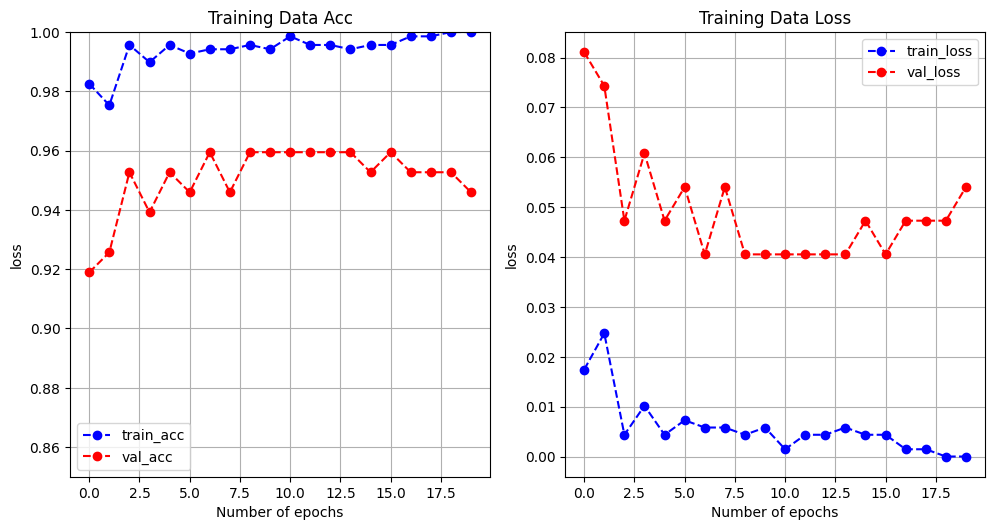

In [ ]:
training_loss = np.array(train_loss)
validation_loss = np.array(valid_loss)

train_accuracy = np.array(train_acc)
validation_accuracy = np.array(valid_acc)


fig = plt.figure(figsize=(15,10))

plt.subplot(231)
plt.plot(train_accuracy, 'bo--', label='train_acc')
plt.plot(validation_accuracy , 'ro--', label = 'val_acc')
plt.title('Training Data Acc')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.ylim(0.85, 1)
plt.tight_layout()

plt.subplot(232)
plt.plot(training_loss, 'bo--', label='train_loss')
plt.plot(validation_loss, 'ro--', label = 'val_loss')
plt.title('Training Data Loss')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, pred_test)
acc_test = model.score(X_test, y_test)

print(f"Validation - Mean Squared Error: {mse_test:.4f}, Accuracy: {acc_test:.4f}\n")


Validation - Mean Squared Error: 0.0811, Accuracy: 0.9189



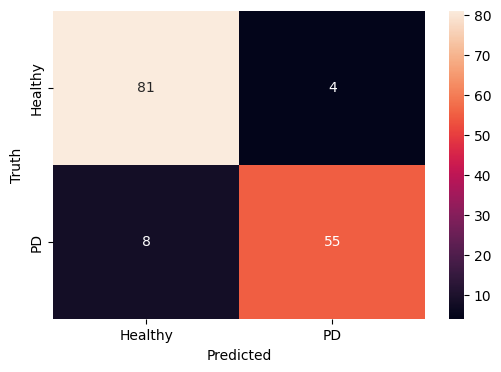

In [ ]:
# Confusion Matrix

class_names = ('Healthy', 'PD')
cnf_matrix = metrics.confusion_matrix(y_test, pred_test)

plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix, annot=True, xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

In [ ]:
# Classification Report

print(metrics.classification_report(y_test, pred_test, target_names=class_names))

              precision    recall  f1-score   support

     Healthy       0.91      0.95      0.93        85
          PD       0.93      0.87      0.90        63

    accuracy                           0.92       148
   macro avg       0.92      0.91      0.92       148
weighted avg       0.92      0.92      0.92       148



### ***ROC Curve***

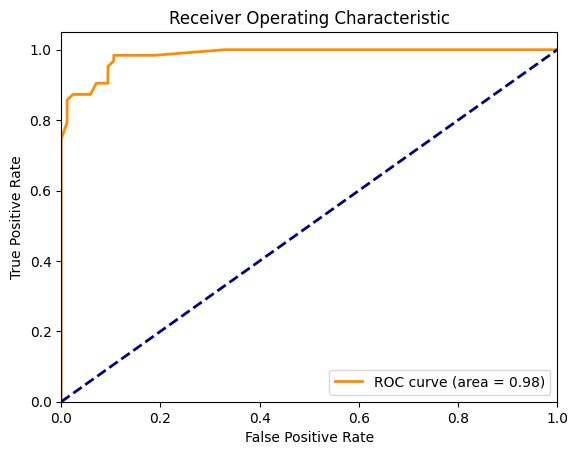

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

n_classes = 2
y_score = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure()
plt.plot(fpr[1], tpr[1], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Navive Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# Train the classifier
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5472972972972973

In [ ]:
pred_test = clf.predict(X_test)

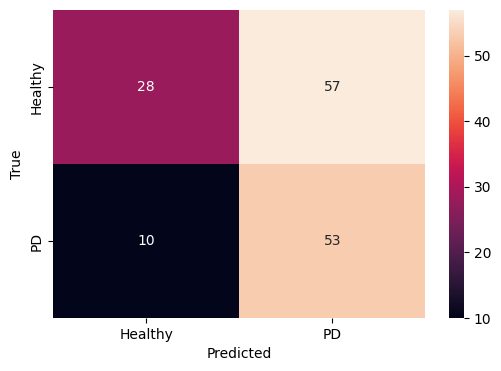

In [ ]:
# Confusion Matrix

class_names = ('Healthy', 'PD')

cnf_matrix = metrics.confusion_matrix(y_test, pred_test)

plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix, annot=True, xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [ ]:
# Classification Report
print(metrics.classification_report(y_test, pred_test, target_names=class_names))

              precision    recall  f1-score   support

     Healthy       0.74      0.33      0.46        85
          PD       0.48      0.84      0.61        63

    accuracy                           0.55       148
   macro avg       0.61      0.59      0.53       148
weighted avg       0.63      0.55      0.52       148



## ***Updated Model with Features Selection***

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

# Create the feature selection and classifier objects
feature_selection = SelectFromModel(LinearSVC(dual=False, penalty="l2", max_iter=20, random_state=42))
classification = RandomForestClassifier(n_estimators=1, warm_start=False, random_state=42)

# Apply feature selection on training and validation sets
X_train_transformed = feature_selection.fit_transform(X_train, y_train)
X_val_transformed = feature_selection.transform(X_val)


# Lists to store scores and losses
train_scores = []
val_scores = []
train_losses = []
val_losses = []

# Number of iterations
n_iters = 20

for i in range(n_iters):
    # Train the classifier
    classification.n_estimators = i+1
    classification.fit(X_train_transformed, y_train)

    # Calculate training and validation scores
    train_score = classification.score(X_train_transformed, y_train)
    val_score = classification.score(X_val_transformed, y_val)

    # Calculate training and validation losses
    train_loss = log_loss(y_train, classification.predict(X_train_transformed))
    val_loss = log_loss(y_val, classification.predict(X_val_transformed))

    # Save scores and losses
    train_scores.append(train_score)
    val_scores.append(val_score)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Print scores and losses every 20 iterations
    if i % 2 == 0:
        print(f"Iteration {i}:")
        print(f"Training score: {train_score}, Validation score: {val_score}")
        print(f"Training loss: {train_loss}, Validation loss: {val_loss}")


Iteration 0:
Training score: 0.9796511627906976, Validation score: 0.9459459459459459
Training loss: 0.7334464352436633, Validation loss: 1.9483055886009273
Iteration 2:
Training score: 0.9956395348837209, Validation score: 0.9527027027027027
Training loss: 0.15716709326649944, Validation loss: 1.7047673900258113
Iteration 4:
Training score: 0.9956395348837209, Validation score: 0.9527027027027027
Training loss: 0.1571670932664994, Validation loss: 1.7047673900258113
Iteration 6:
Training score: 0.9956395348837209, Validation score: 0.9662162162162162
Training loss: 0.1571670932664994, Validation loss: 1.2176909928755797
Iteration 8:
Training score: 1.0, Validation score: 0.9594594594594594
Training loss: 2.2204460492503136e-16, Validation loss: 1.4612291914506954
Iteration 10:
Training score: 0.997093023255814, Validation score: 0.9527027027027027
Training loss: 0.10477806217766635, Validation loss: 1.7047673900258113
Iteration 12:
Training score: 0.9941860465116279, Validation score:

In [ ]:
print(f"Shape of X_train with all features: {X_train.shape} \nShape of X_train after features reduction: {X_train_transformed.shape}")

Shape of X_train with all features: (688, 93) 
Shape of X_train after features reduction: (688, 39)


***Plotting loss curves***

In [ ]:
feature_selection

SelectFromModel(estimator=LinearSVC(dual=False, max_iter=20, random_state=42))

In [ ]:
classification

RandomForestClassifier(n_estimators=20, random_state=42)

### ***Accuracy & Loss Curves***

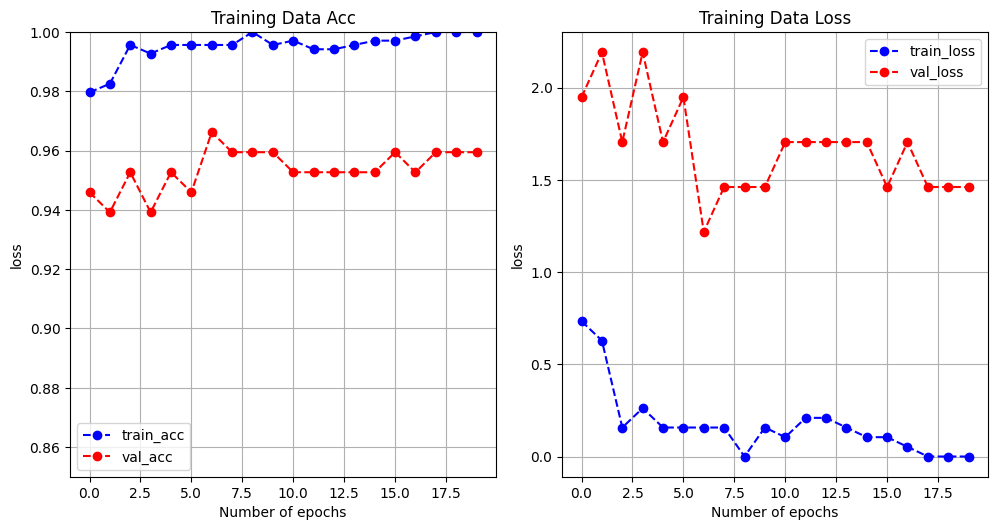

In [ ]:
train_loss_arr = np.array(train_losses)
val_loss_arr = np.array(val_losses)

train_accuracy = np.array(train_scores)
validation_accuracy = np.array(val_scores)

fig = plt.figure(figsize=(15,10))

plt.subplot(231)
plt.plot(train_accuracy, 'bo--', label='train_acc')
plt.plot(validation_accuracy , 'ro--', label = 'val_acc')
plt.title('Training Data Acc')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.ylim(0.85, 1)
plt.tight_layout()

plt.subplot(232)
plt.plot(train_loss_arr, 'bo--', label='train_loss')
plt.plot(val_loss_arr, 'ro--', label = 'val_loss')
plt.title('Training Data Loss')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
X_test_transformed = feature_selection.transform(X_test)


In [ ]:
pred_test = classification.predict(X_test_transformed)
mse_test = mean_squared_error(y_test, pred_test)
acc_test = classification.score(X_test_transformed, y_test)

print(f"Validation - Mean Squared Error: {mse_test:.4f}, accuracy: {acc_test:.4f}\n")


Validation - Mean Squared Error: 0.0405, accuracy: 0.9595



In [ ]:
class_names = ('Healthy', 'PD')

### ***Confusion Matrix***

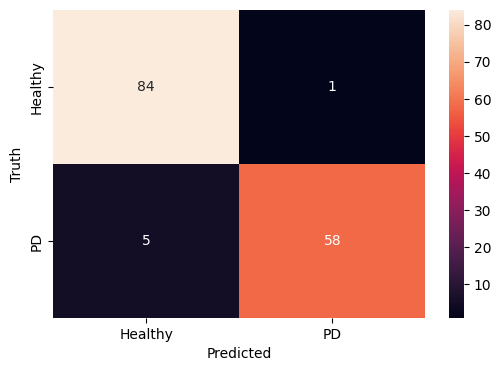

In [ ]:
#
cnf_matrix = metrics.confusion_matrix(y_test, pred_test)

plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix, annot=True, xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

In [ ]:
# Classification Report

print(metrics.classification_report(y_test, pred_test, target_names=class_names))

              precision    recall  f1-score   support

     Healthy       0.94      0.99      0.97        85
          PD       0.98      0.92      0.95        63

    accuracy                           0.96       148
   macro avg       0.96      0.95      0.96       148
weighted avg       0.96      0.96      0.96       148



## Navive Bayes Model Reduced

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss

# Create the feature selection and classifier objects
feature_selection = SelectFromModel(LinearSVC(dual=False, penalty="l2", max_iter=20, random_state=42))
X_train_transformed = feature_selection.fit_transform(X_train, y_train)
X_val_transformed = feature_selection.transform(X_val)


In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# Train the classifier
clf.fit(X_train_transformed, y_train)

clf.score(X_val_transformed, y_test)

0.47297297297297297

In [ ]:
X_test_transformed = feature_selection.transform(X_test)

In [ ]:
pred_test = clf.predict(X_test_transformed)

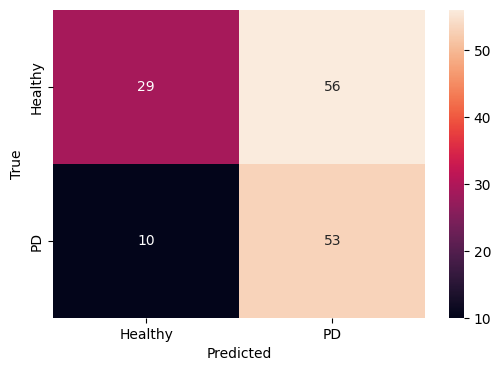

In [ ]:
# Confusion Matrix

class_names = ('Healthy', 'PD')

cnf_matrix = metrics.confusion_matrix(y_test, pred_test)

plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix, annot=True, xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [ ]:
# Classification Report

print(metrics.classification_report(y_test, pred_test, target_names=class_names))

              precision    recall  f1-score   support

     Healthy       0.74      0.34      0.47        85
          PD       0.49      0.84      0.62        63

    accuracy                           0.55       148
   macro avg       0.61      0.59      0.54       148
weighted avg       0.63      0.55      0.53       148



Saving models

In [ ]:
import pickle

In [ ]:
!mkdir "/content/drive/MyDrive/ML_proj/Trained_Models2"

In [ ]:
# Save the classification model
with open('/content/drive/MyDrive/ML_proj/Trained_Models2/classification_model2.pkl', 'wb') as model_file:
    pickle.dump(classification, model_file)

# Save the feature_selection model
with open('/content/drive/MyDrive/ML_proj/Trained_Models2/feature_selection_model2.pkl', 'wb') as model_file:
    pickle.dump(feature_selection, model_file)

with open('/content/drive/MyDrive/ML_proj/Trained_Models2/Minmax_transform2.pkl', 'wb') as model_file:
    pickle.dump(scalar, model_file)

### ***ROC Curve***

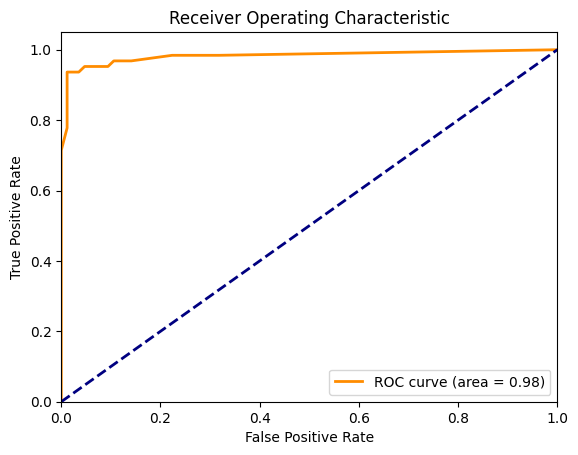

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

n_classes = 2
y_score = classification.predict_proba(X_test_transformed)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure()
plt.plot(fpr[1], tpr[1], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


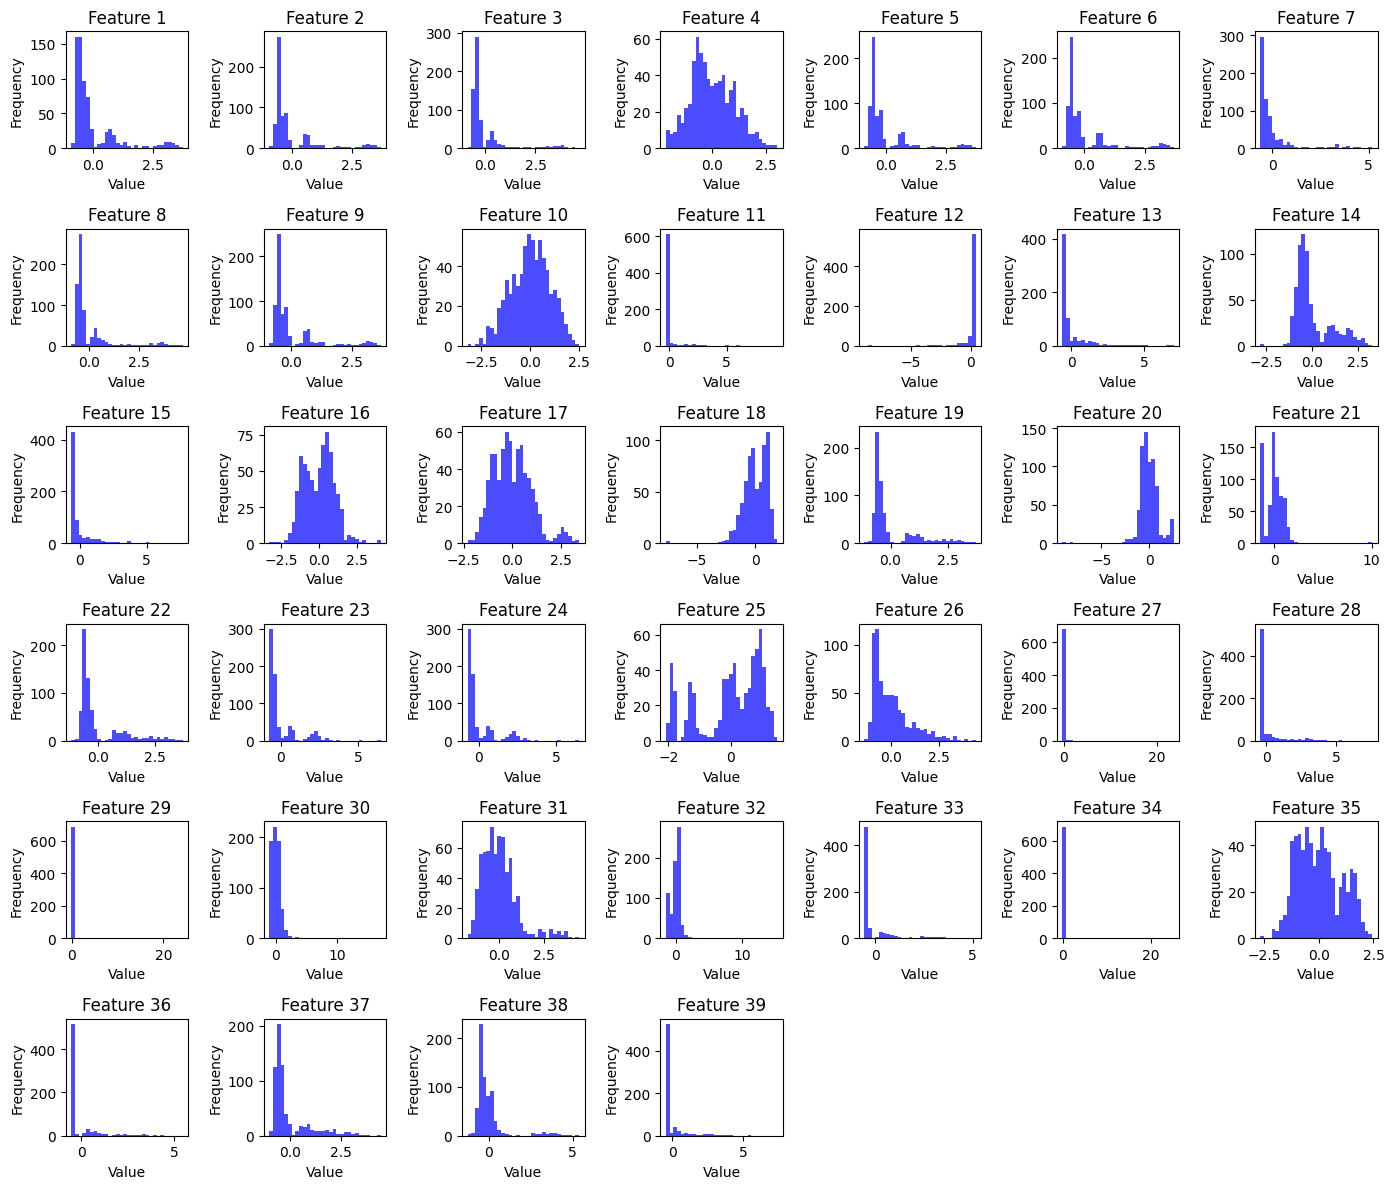

In [ ]:
X_train_transformed_df = pd.DataFrame(X_train_transformed)
n_rows = int(np.ceil(X_train_transformed_df.shape[1] / 7))
n_cols = 7
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 2*n_rows))
axes = axes.flatten()
for i in range(X_train_transformed_df.shape[1], n_rows*n_cols):
    fig.delaxes(axes[i])
    
for i in range(X_train_transformed_df.shape[1]):
    axes[i].hist(X_train_transformed_df.iloc[:, i], bins=30, color='blue', alpha=0.7)
    axes[i].set_title(f'Feature {i+1}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### PCA plot After Feature Selection

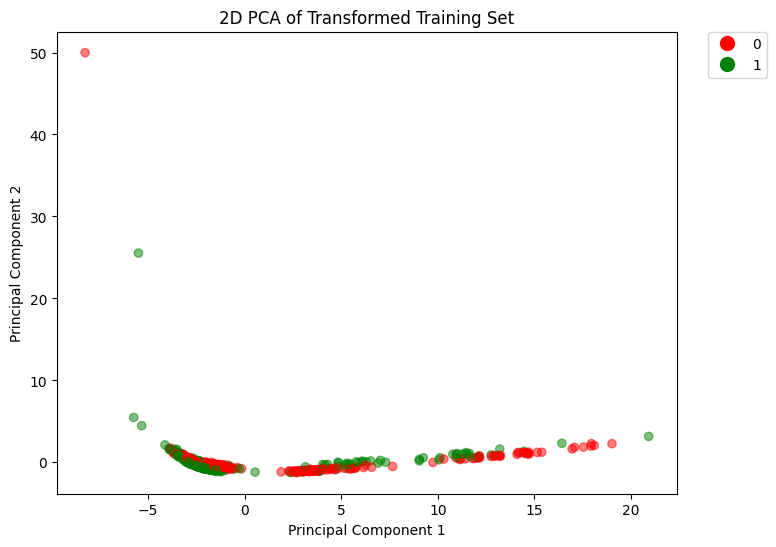

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_train_transformed_df = pd.DataFrame(X_train_transformed)
X_train_transformed_pca = pca.fit_transform(X_train_transformed_df)
X_train_transformed_pca_df = pd.DataFrame(data = X_train_transformed_pca, columns = ['Principal Component 1', 'Principal Component 2'])

colors = ['red', 'green'] 
unique_labels = np.unique(y_train)
label_colors = {label: colors[i] for i, label in enumerate(unique_labels)}
label_colors_array = [label_colors[label] for label in y_train]
plt.figure(figsize=(8,6))
plt.scatter(X_train_transformed_pca_df['Principal Component 1'], X_train_transformed_pca_df['Principal Component 2'], c=label_colors_array, alpha=0.5)
plt.title('2D PCA of Transformed Training Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
patches = [plt.plot([],[], marker="o", ms=10, ls="", color=colors[i],
            label="{:d}".format(unique_labels[i]) )[0]  for i in range(len(unique_labels))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

plt.show()


# ***Plotting_ROI***

In [ ]:
import nibabel as nib
img1 = nib.load('/content/drive/MyDrive/ML_proj/IXI_brain/female/002-Guys-0828-T1.nii.gz')
img2 = nib.load('/content/drive/MyDrive/ML_proj/Sub_Data/Healthy/002-Guys-0828-T1.nii.gz')
#ref_skull = nib.load('/content/drive/MyDrive/ML_proj/MNUPD25/PD25-T1MPRAGE-template-1mm.nii.gz')
ref_brain = nib.load('/content/drive/MyDrive/ML_proj/MNUPD25/PD25-T1MPRAGE-brain-1mm.nii.gz')
mask_im = nib.load('/content/drive/MyDrive/ML_proj/MNUPD25/PD25-subcortical-1mm.nii.gz')

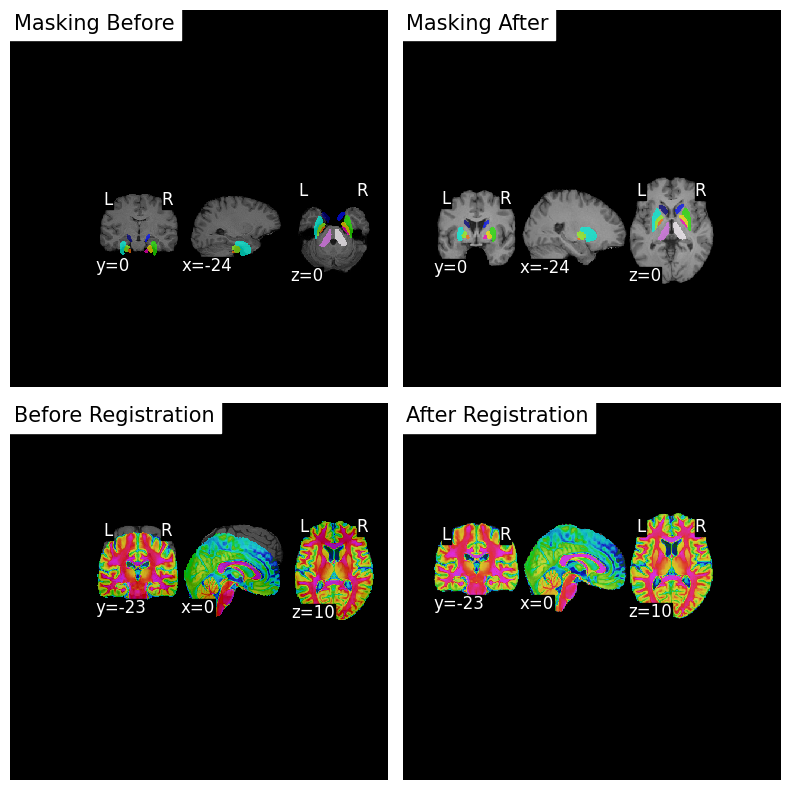

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

plotting.plot_roi(mask_im, img1, axes=axs[0, 0], title='Masking Before', draw_cross=False)

plotting.plot_roi(mask_im, img2, axes=axs[0, 1], title='Masking After', draw_cross=False)

plotting.plot_roi(ref_brain, img1, axes=axs[1, 0], title='Before Registration', draw_cross=False)


plotting.plot_roi(ref_brain, img2, axes=axs[1, 1], title='After Registration', draw_cross=False)


plt.tight_layout()
plt.show()


### Mask For Feature Extraction

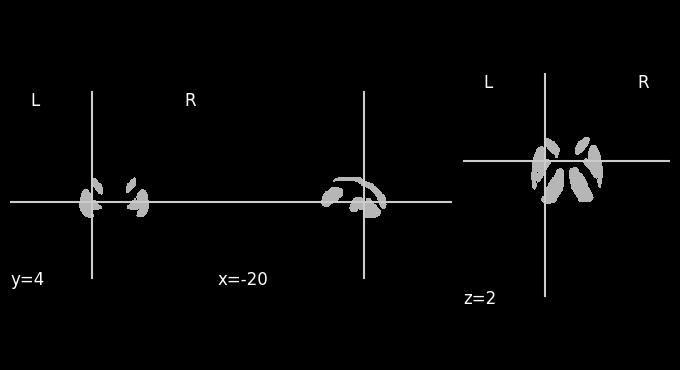

In [ ]:
img = nib.load('/content/drive/MyDrive/ML_proj/MNUPD25/PD25-subcortical-1mm_bmask.nii.gz')
plotting.plot_anat(img, cut_coords=(-20, 4, 2))